## Decision Trees

## Set up data

In [147]:
# Load essential libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Read csv file
df = pd.read_csv('../data/cleaned_wf_demo.csv', index_col=0)
print(df.head())

          company  seniority job_category  gender ethnicity       count  \
1  The Home Depot          4        Admin  female       api    6.649361   
2  The Home Depot          3        empty    male       api    0.114460   
3  The Home Depot          5    Scientist    male       api    0.005991   
4  The Home Depot          1     Engineer    male       api  192.650237   
5  The Home Depot          3     Engineer  female       api   84.062919   

      inflow   outflow        salary  
1   0.027259  0.020727  6.296236e+05  
2   0.000265  0.000297  8.108699e+03  
3   0.001000  0.000000  5.206698e+02  
4  10.110865  6.249455  1.124800e+07  
5   1.707721  1.253758  8.842880e+06  


## Clean data for Decision Trees

In [148]:
# Convert categorical variables to dummy variables using pd.get_dummies

# Dummies for job_category
dummies = pd.get_dummies(df['job_category']).rename(columns=lambda x: 'job_category_' + str(x))
df = pd.concat([df, dummies], axis=1) #add back into the dataframe
df.drop(['job_category'], inplace=True, axis = 1) #remove job_category column

# Repeat for gender
dummies = pd.get_dummies(df['gender']).rename(columns=lambda x: 'gender_' + str(x))
df = pd.concat([df, dummies], axis=1) #add back into the dataframe
df.drop(['gender'], inplace=True, axis = 1) #remove gender column

# Repeat for ethnicity
dummies = pd.get_dummies(df['ethnicity']).rename(columns=lambda x: 'ethnicity_' + str(x))
df = pd.concat([df, dummies], axis=1) #add back into the dataframe
df.drop(['ethnicity'], inplace=True, axis = 1) #remove ethnicity column

# Confirm new column names and that there are no NAs
print(df.columns)
print(df.isnull().sum())

Index(['company', 'seniority', 'count', 'inflow', 'outflow', 'salary',
       'job_category_Admin', 'job_category_Engineer', 'job_category_Finance',
       'job_category_Marketing', 'job_category_Operations',
       'job_category_Sales', 'job_category_Scientist', 'job_category_empty',
       'gender_female', 'gender_male', 'ethnicity_api', 'ethnicity_black',
       'ethnicity_hispanic', 'ethnicity_multiple', 'ethnicity_native',
       'ethnicity_white'],
      dtype='object')
company                    0
seniority                  0
count                      0
inflow                     0
outflow                    0
salary                     0
job_category_Admin         0
job_category_Engineer      0
job_category_Finance       0
job_category_Marketing     0
job_category_Operations    0
job_category_Sales         0
job_category_Scientist     0
job_category_empty         0
gender_female              0
gender_male                0
ethnicity_api              0
ethnicity_black           

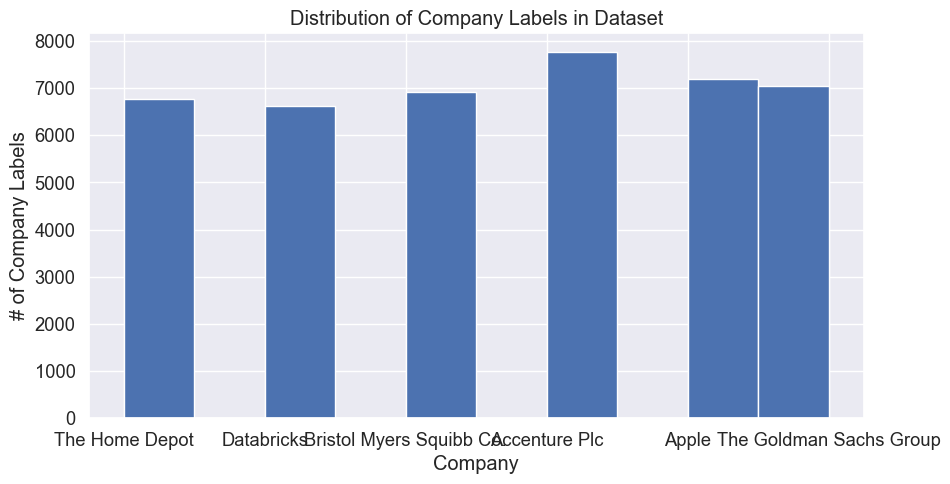

In [157]:
## Examine class distribution
sns.set(font_scale=1.2)

# Visualize class distribution
fig, ax = plt.subplots(figsize=(10,5))
df['company'].hist()
ax.set_title("Distribution of Company Labels in Dataset")
ax.set_xlabel("Company")
ax.set_ylabel("# of Company Labels")

# save picture
fig1 = ax.get_figure()
fig1.savefig("../501-project-website/images/company_labels_distribution.png")

In [149]:
## SET X AND Y

# y: convert df['company'] string labels to dummy integers
labels=[]; 
y=[]

for label in df["company"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y.append(i)
y = np.array(y)

# X
X = df.drop(['company'], axis = 1)

# Double check
print(X.shape,y.shape)

index = 0 : label = The Home Depot
index = 1 : label = Databricks
index = 2 : label = Bristol Myers Squibb Co.
index = 3 : label = Accenture Plc
index = 4 : label = Apple
index = 5 : label = The Goldman Sachs Group
(42336, 21) (42336,)


In [150]:
# Load sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Partion data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

# Check 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33868, 21)
(33868,)
(8468, 21)
(8468,)


## Support Vector Classifier

In [151]:
# Initialize model

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit model
model = DecisionTreeClassifier(random_state=0)

model

DecisionTreeClassifier(random_state=0)

In [152]:
# Import sklearn
from sklearn.utils.fixes import sklearn

# Fit model to training data
model.fit(X_train, y_train) 

# Predict on X_train
y_train_pred = model.predict(X_train)

In [153]:
# TEST ACCURACY
# Training set
print("Training set")
print("Accuracy: ", accuracy_score(y_train, y_train_pred) * 100) #accuracy score
print("Number of mislabeled points out of a total 4275 points: ", (y_train != y_train_pred).sum()) #mislabeled points

# Test set
y_test_pred = model.predict(X_test)
print("Test set")
print("Accuracy: ", accuracy_score(y_test, y_test_pred)*100) #accuracy score
print("Number of mislabeled points out of a total 1069 points: ", (y_test != y_test_pred).sum()) #mislabeled points

Training set
Accuracy:  99.2027872918389
Number of mislabeled points out of a total 4275 points:  270
Test set
Accuracy:  89.66698157770429
Number of mislabeled points out of a total 1069 points:  875


## Visualize data

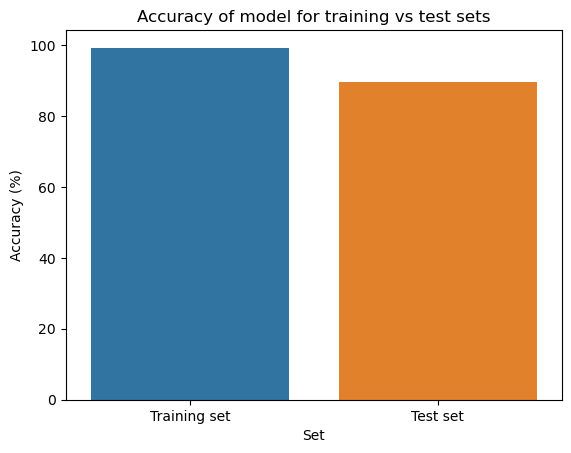

In [154]:
model_accuracies = pd.DataFrame({'Set':['Training set','Test set'], 'Accuracy (%)': [accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred)*100]})
sns.barplot(data=model_accuracies, x="Set", y="Accuracy (%)").set(title = 'Accuracy of model for training vs test sets' )

# Save plot
plt.savefig("../501-project-website/images/DT_record_accuracy.png")

In [142]:
# # Visualize decision tree
# from dtreeviz.trees import tree
# import graphviz

# # Draw a decision tree
# def plot_tree(model, X, Y):
#     fig = plt.figure(figsize=(30, 25), dpi=150)
#     _ = tree.plot_tree(model,
#                       feature_names = feature_cols,
#                        class_names = target_labels,
#                        filled = True,
#                       fontsize=11)
#     fig.savefig(os.path.join(img_path, 'decision_tree_final.png'), bbox_inches = "tight")
    
# plot_tree(model, X, y)

## Confusion matrix

/Users/cynthiang/opt/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


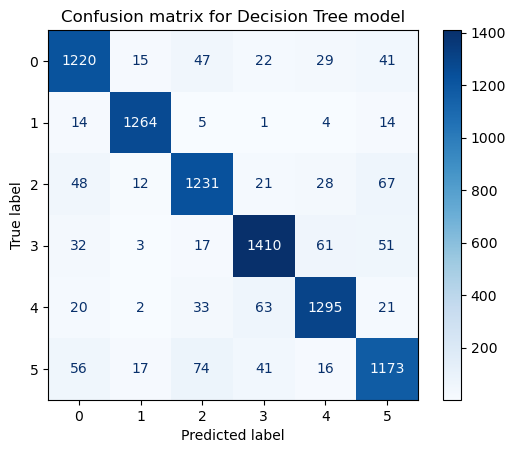

In [156]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test , y_test , cmap="Blues")

# Plot confusion matrix
plt.title("Confusion matrix for Decision Tree model")

# Save confusion matrix plot
plt.savefig("../501-project-website/images/DT_record_confusion_matrix.png")